In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
from matplotlib import cm
import matplotlib as mpl
from cycler import cycler
from matplotlib import rc
import scipy.stats
from sklearn.metrics import explained_variance_score


In [28]:
true4_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy"))
true4_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[-20:,:50000]
true8_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true8_na = np.load("/media/hdd01/sklee/CA1_clust8-30/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true12_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true12_na = np.load("/media/hdd01/sklee/CA1_clust12-20/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]

one4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/glm_s10_h1_output.npz")["test"] + true4_nona_mean
two4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/glm_s10_h2_output.npz")["test"] + true4_nona_mean
gru4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"] + true4_nona_mean
one4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h1_output.npz")["test"]
two4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["test"]
gru4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]
one4_test = one4_nona_test + one4_diff_test
two4_test = two4_nona_test + two4_diff_test
gru4_test = gru4_nona_test + gru4_diff_test
gru4_whole_test = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/gru_s10_h20_output.npz")["test"]
two4_whole_test = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h2_output.npz")["test"]

one8_nona_test = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/hand/glm_s14_h1_output.npz")["test"] + true8_nona_mean
two8_nona_test = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/hand/glm_s14_h2_output.npz")["test"] + true8_nona_mean
gru8_nona_test = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/hand/gru_s14_h20_output.npz")["test"] + true8_nona_mean
one8_diff_test = np.load("/media/hdd01/sklee/CA1_clust8-30/hand/glm_s14_h1_output.npz")["test"]
two8_diff_test = np.load("/media/hdd01/sklee/CA1_clust8-30/hand/glm_s14_h2_output.npz")["test"]
gru8_diff_test = np.load("/media/hdd01/sklee/CA1_clust8-30/hand/gru_s14_h20_output.npz")["test"]
one8_test = one8_nona_test + one8_diff_test
two8_test = two8_nona_test + two8_diff_test
gru8_test = gru8_nona_test + gru8_diff_test
gru8_whole_test = np.load("/media/hdd01/sklee/CA1_clust8-30/whole/gru_s14_h20_output.npz")["test"]
two8_whole_test = np.load("/media/hdd01/sklee/CA1_clust8-30/whole/glm_s14_h2_output.npz")["test"]

one12_nona_test = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/hand/glm_s18_h1_output.npz")["test"] + true12_nona_mean
two12_nona_test = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/hand/glm_s18_h2_output.npz")["test"] + true12_nona_mean
gru12_nona_test = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/hand/gru_s18_h20_output.npz")["test"] + true12_nona_mean
one12_diff_test = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/glm_s18_h1_output.npz")["test"]
two12_diff_test = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/glm_s18_h2_output.npz")["test"]
gru12_diff_test = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/gru_s18_h20_output.npz")["test"]
one12_test = one12_nona_test + one12_diff_test
two12_test = two12_nona_test + two12_diff_test
gru12_test = gru12_nona_test + gru12_diff_test
gru12_whole_test = np.load("/media/hdd01/sklee/CA1_clust12-20/whole/gru_s18_h20_output.npz")["test"]
two12_whole_test = np.load("/media/hdd01/sklee/CA1_clust12-20/whole/glm_s18_h2_output.npz")["test"]

In [31]:
var_exp = np.empty((20, 15))

for i in range(20):
    var_exp[i,0] = explained_variance_score(true4_na[i], gru4_whole_test[i])
    var_exp[i,1] = explained_variance_score(true4_na[i], two4_whole_test[i])
    var_exp[i,2] = explained_variance_score(true4_na[i], one4_test[i])
    var_exp[i,3] = explained_variance_score(true4_na[i], two4_test[i])
    var_exp[i,4] = explained_variance_score(true4_na[i], gru4_test[i])
    var_exp[i,5] = explained_variance_score(true8_na[i], gru8_whole_test[i])
    var_exp[i,6] = explained_variance_score(true8_na[i], two8_whole_test[i])
    var_exp[i,7] = explained_variance_score(true8_na[i], one8_test[i])
    var_exp[i,8] = explained_variance_score(true8_na[i], two8_test[i])
    var_exp[i,9] = explained_variance_score(true8_na[i], gru8_test[i])
    var_exp[i,10] = explained_variance_score(true12_na[i], gru12_whole_test[i])
    var_exp[i,11] = explained_variance_score(true12_na[i], two12_whole_test[i])
    var_exp[i,12] = explained_variance_score(true12_na[i], one12_test[i])
    var_exp[i,13] = explained_variance_score(true12_na[i], two12_test[i])
    var_exp[i,14] = explained_variance_score(true12_na[i], gru12_test[i])

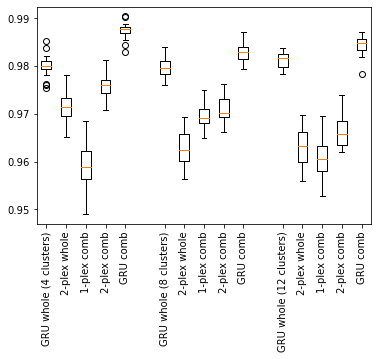

In [35]:
plt.boxplot(var_exp, positions=[1,2,3,4,5, 7,8,9,10,11, 13,14,15,16,17])
labels=["GRU whole (4 clusters)", "2-plex whole", "1-plex comb", "2-plex comb", "GRU comb",
       "GRU whole (8 clusters)", "2-plex whole", "1-plex comb", "2-plex comb", "GRU comb",
       "GRU whole (12 clusters)", "2-plex whole", "1-plex comb", "2-plex comb", "GRU comb"]
plt.xticks([1,2,3,4,5, 7,8,9,10,11, 13,14,15,16,17], labels=labels, rotation=90)
plt.show()

In [36]:
thresh_bin_no = 200

means = np.zeros((thresh_bin_no, 4))
stds = np.zeros((thresh_bin_no, 4))
bins = np.linspace(np.min(true4_na), np.max(true4_na), thresh_bin_no+1)

for i in range(thresh_bin_no):
    idx = np.where((true4_na.flatten() >= bins[i]) & (true4_na.flatten() < bins[i+1]))[0]
    means[i,1] = np.mean(one4_test.flatten()[idx])
    means[i,2] = np.mean(two4_test.flatten()[idx])
    means[i,3] = np.mean(gru4_test.flatten()[idx])
    means[i,0] = (bins[i] + bins[i+1])/2
    stds[i,0] = (bins[i] + bins[i+1])/2
    stds[i,1] = np.std(one4_test.flatten()[idx])
    stds[i,2] = np.std(two4_test.flatten()[idx])
    stds[i,3] = np.std(gru4_test.flatten()[idx])

/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


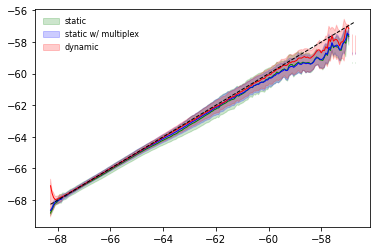

In [38]:
plt.plot(means[:,0],means[:,1], linewidth=1, color="green")
plt.plot(means[:,0],means[:,2], linewidth=1, color="blue")
plt.plot(means[:,0],means[:,3], linewidth=1, color="red")
plt.fill_between(means[:,0], means[:,1]-stds[:,1], means[:,1]+stds[:,1], color="green", alpha=0.2, label="static")
plt.fill_between(means[:,0], means[:,2]-stds[:,2], means[:,2]+stds[:,2], color="blue", alpha=0.2, label="static w/ multiplex")
plt.fill_between(means[:,0], means[:,2]-stds[:,3], means[:,3]+stds[:,3], color="red", alpha=0.2, label="dynamic")
plt.plot(means[:,0], means[:,0], linewidth=1, color="black", linestyle="--")
#ax15.margins(x=0.005, y=0.005)
#ax15.spines.right.set_visible(False)
#ax15.spines.top.set_visible(False)
#ax15.set_ylabel("predicted voltage (mV)")
#ax15.set_xlabel("true voltage (mV)")
plt.legend(fontsize=8, frameon=False)
#ax15.set_yticks(np.arange(-69,-56.9,3))
#ax15.set_xticks(np.arange(-69,-56.9,3))
plt.title("4 clusters")